In [204]:
#import necessary modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib

In [205]:
#import excel file

excel_file = 'SupplyChainEmissionFactorsforUSIndustriesCommodities.xlsx'  
years = range(2010, 2017)



In [206]:
years[3]

2013

In [207]:
#create data frame for commodity details

df_1 = pd.read_excel(excel_file, sheet_name=f'{years[0]}_Detail_Commodity')
df_1.head()

,Commodity Code,Commodity Name,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Unnamed: 7,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins
0,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",carbon dioxide,"kg/2018 USD, purchaser price",0.398,0.073,0.470,NaN,4,3,1,4,1
1,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",methane,"kg/2018 USD, purchaser price",0.001,0.001,0.002,NaN,4,3,1,1,1
2,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",nitrous oxide,"kg/2018 USD, purchaser price",0.002,0.000,0.002,NaN,4,3,1,4,1
3,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",other GHGs,"kg CO2e/2018 USD, purchaser price",0.002,0.000,0.002,NaN,3,3,1,3,1
4,1111B0,"Fresh wheat, corn, rice, and other grains",carbon dioxide,"kg/2018 USD, purchaser price",0.659,0.081,0.740,NaN,4,3,1,4,1


In [208]:
#create data frame for Industry details


df_2 = pd.read_excel(excel_file, sheet_name=f'{years[0]}_Detail_Industry')
df_2.head()

,Industry Code,Industry Name,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Unnamed: 7,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins
0,1111A0,Oilseed farming,carbon dioxide,"kg/2018 USD, purchaser price",0.414,0.073,0.487,NaN,4,3,1,4,1
1,1111A0,Oilseed farming,methane,"kg/2018 USD, purchaser price",0.001,0.001,0.002,NaN,4,3,1,1,1
2,1111A0,Oilseed farming,nitrous oxide,"kg/2018 USD, purchaser price",0.002,0.000,0.002,NaN,4,3,1,4,1
3,1111A0,Oilseed farming,other GHGs,"kg CO2e/2018 USD, purchaser price",0.002,0.000,0.002,NaN,3,3,1,3,1
4,1111B0,Grain farming,carbon dioxide,"kg/2018 USD, purchaser price",0.680,0.082,0.762,NaN,4,3,1,4,1


In [209]:
#create data frame for Industry summary


df_3 = pd.read_excel(excel_file, sheet_name=f'{years[0]}_Summary_Industry')
df_3.head()

,Industry Code,Industry Name,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Unnamed: 7,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins
0,111CA,Farms,carbon dioxide,"kg/2018 USD, purchaser price",0.525,0.057,0.582,NaN,4,3,1,4,1
1,111CA,Farms,methane,"kg/2018 USD, purchaser price",0.029,0.001,0.030,NaN,4,3,1,1,1
2,111CA,Farms,nitrous oxide,"kg/2018 USD, purchaser price",0.003,0.000,0.003,NaN,4,3,1,4,1
3,111CA,Farms,other GHGs,"kg CO2e/2018 USD, purchaser price",0.005,0.000,0.005,NaN,3,3,1,3,1
4,113FF,"Forestry, fishing, and related activities",carbon dioxide,"kg/2018 USD, purchaser price",0.232,0.024,0.256,NaN,4,3,1,4,1


In [210]:
#create data frame for Commodity summary


df_4 = pd.read_excel(excel_file, sheet_name=f'{years[0]}_Summary_Commodity')
df_4.head()

,Commodity Code,Commodity Name,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Unnamed: 7,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins
0,111CA,Farms,carbon dioxide,"kg/2018 USD, purchaser price",0.526,0.061,0.588,NaN,4,3,1,4,1
1,111CA,Farms,methane,"kg/2018 USD, purchaser price",0.029,0.001,0.030,NaN,4,3,1,1,1
2,111CA,Farms,nitrous oxide,"kg/2018 USD, purchaser price",0.003,0.000,0.003,NaN,4,3,1,4,1
3,111CA,Farms,other GHGs,"kg CO2e/2018 USD, purchaser price",0.005,0.000,0.005,NaN,3,3,1,3,1
4,113FF,"Forestry, fishing, and related activities",carbon dioxide,"kg/2018 USD, purchaser price",0.256,0.032,0.288,NaN,4,3,1,4,1


In [211]:
#try bolck to rename and concatenate data

all_data = []

for year in years:
    try:
        df_com = pd.read_excel(excel_file, sheet_name=f'{year}_Detail_Commodity')
        df_ind = pd.read_excel(excel_file, sheet_name=f'{year}_Detail_Industry')

        df_com['Source']= 'Commodity'
        df_ind['Source']= 'Industry'
        df_com['Year'] = df_ind['Year'] = year

        df_com.columns = df_com.columns.str.strip()
        df_ind.columns = df_ind.columns.str.strip()

        df_com.rename(columns={
            'Commodity Code': 'Code',
            'Commodity Name': 'Name'
        }, inplace=True)

        df_ind.rename(columns={
            'Commodity Code': 'Code',
            'Commodity Name': 'Name'
        }, inplace=True)

        all_data.append(pd.concat([df_com, df_ind], ignore_index=True))
        

    except Exception as e:
        print(f"Error processing year {year}: {e}")

In [212]:
#view data

all_data[3]

,Code,Name,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Unnamed: 7,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins,Source,Year,Industry Code,Industry Name
0,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",carbon dioxide,"kg/2018 USD, purchaser price",0.373,0.072,0.444,NaN,4,3,1,4,1,Commodity,2013,NaN,NaN
1,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",methane,"kg/2018 USD, purchaser price",0.001,0.001,0.002,NaN,4,3,1,1,1,Commodity,2013,NaN,NaN
2,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",nitrous oxide,"kg/2018 USD, purchaser price",0.002,0.000,0.002,NaN,4,3,1,4,1,Commodity,2013,NaN,NaN
3,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",other GHGs,"kg CO2e/2018 USD, purchaser price",0.002,0.000,0.002,NaN,3,3,1,4,1,Commodity,2013,NaN,NaN
4,1111B0,"Fresh wheat, corn, rice, and other grains",carbon dioxide,"kg/2018 USD, purchaser price",0.722,0.079,0.801,NaN,4,3,1,4,1,Commodity,2013,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3151,NaN,NaN,other GHGs,"kg CO2e/2018 USD, purchaser price",0.008,0.000,0.008,NaN,4,3,1,5,1,Industry,2013,813B00,"Civic, social, professional, and similar organ..."
3152,NaN,NaN,carbon dioxide,"kg/2018 USD, purchaser price",0.000,0.000,0.000,NaN,4,3,1,5,1,Industry,2013,814000,Private households
3153,NaN,NaN,methane,"kg/2018 USD, purchaser price",0.000,0.000,0.000,NaN,4,3,1,5,1,Industry,2013,814000,Private households
3154,NaN,NaN,nitrous oxide,"kg/2018 USD, purchaser price",0.000,0.000,0.000,NaN,4,3,1,5,1,Industry,2013,814000,Private households


In [213]:
len(all_data)

7

In [214]:
df = pd.concat(all_data, ignore_index=True)
df.head(10)

,Code,Name,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Unnamed: 7,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins,Source,Year,Industry Code,Industry Name
0,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",carbon dioxide,"kg/2018 USD, purchaser price",0.398,0.073,0.470,NaN,4,3,1,4,1,Commodity,2010,NaN,NaN
1,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",methane,"kg/2018 USD, purchaser price",0.001,0.001,0.002,NaN,4,3,1,1,1,Commodity,2010,NaN,NaN
2,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",nitrous oxide,"kg/2018 USD, purchaser price",0.002,0.000,0.002,NaN,4,3,1,4,1,Commodity,2010,NaN,NaN
3,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",other GHGs,"kg CO2e/2018 USD, purchaser price",0.002,0.000,0.002,NaN,3,3,1,3,1,Commodity,2010,NaN,NaN
4,1111B0,"Fresh wheat, corn, rice, and other grains",carbon dioxide,"kg/2018 USD, purchaser price",0.659,0.081,0.740,NaN,4,3,1,4,1,Commodity,2010,NaN,NaN
5,1111B0,"Fresh wheat, corn, rice, and other grains",methane,"kg/2018 USD, purchaser price",0.008,0.001,0.009,NaN,2,3,1,1,1,Commodity,2010,NaN,NaN
6,1111B0,"Fresh wheat, corn, rice, and other grains",nitrous oxide,"kg/2018 USD, purchaser price",0.004,0.000,0.004,NaN,4,3,1,4,1,Commodity,2010,NaN,NaN
7,1111B0,"Fresh wheat, corn, rice, and other grains",other GHGs,"kg CO2e/2018 USD, purchaser price",0.004,0.000,0.004,NaN,3,3,1,3,1,Commodity,2010,NaN,NaN
8,111200,"Fresh vegetables, melons, and potatoes",carbon dioxide,"kg/2018 USD, purchaser price",0.183,0.132,0.315,NaN,3,3,1,4,1,Commodity,2010,NaN,NaN
9,111200,"Fresh vegetables, melons, and potatoes",methane,"kg/2018 USD, purchaser price",0.001,0.001,0.002,NaN,4,3,1,1,1,Commodity,2010,NaN,NaN


In [215]:
len(df)

22092

In [216]:
df.columns

Index(['Code', 'Name', 'Substance', 'Unit',
       'Supply Chain Emission Factors without Margins',
       'Margins of Supply Chain Emission Factors',
       'Supply Chain Emission Factors with Margins', 'Unnamed: 7',
       'DQ ReliabilityScore of Factors without Margins',
       'DQ TemporalCorrelation of Factors without Margins',
       'DQ GeographicalCorrelation of Factors without Margins',
       'DQ TechnologicalCorrelation of Factors without Margins',
       'DQ DataCollection of Factors without Margins', 'Source', 'Year',
       'Industry Code', 'Industry Name'],
      dtype='object')

In [217]:
df.isnull().sum()

Code                                                      11060
Name                                                      11060
Substance                                                     0
Unit                                                          0
Supply Chain Emission Factors without Margins                 0
Margins of Supply Chain Emission Factors                      0
Supply Chain Emission Factors with Margins                    0
Unnamed: 7                                                22092
DQ ReliabilityScore of Factors without Margins                0
DQ TemporalCorrelation of Factors without Margins             0
DQ GeographicalCorrelation of Factors without Margins         0
DQ TechnologicalCorrelation of Factors without Margins        0
DQ DataCollection of Factors without Margins                  0
Source                                                        0
Year                                                          0
Industry Code                           

In [218]:
df.drop(columns=['Unnamed: 7'],inplace=True)

In [219]:
df.columns


Index(['Code', 'Name', 'Substance', 'Unit',
       'Supply Chain Emission Factors without Margins',
       'Margins of Supply Chain Emission Factors',
       'Supply Chain Emission Factors with Margins',
       'DQ ReliabilityScore of Factors without Margins',
       'DQ TemporalCorrelation of Factors without Margins',
       'DQ GeographicalCorrelation of Factors without Margins',
       'DQ TechnologicalCorrelation of Factors without Margins',
       'DQ DataCollection of Factors without Margins', 'Source', 'Year',
       'Industry Code', 'Industry Name'],
      dtype='object')

In [220]:
print(df.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22092 entries, 0 to 22091
Data columns (total 16 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Code                                                    11032 non-null  object 
 1   Name                                                    11032 non-null  object 
 2   Substance                                               22092 non-null  object 
 3   Unit                                                    22092 non-null  object 
 4   Supply Chain Emission Factors without Margins           22092 non-null  float64
 5   Margins of Supply Chain Emission Factors                22092 non-null  float64
 6   Supply Chain Emission Factors with Margins              22092 non-null  float64
 7   DQ ReliabilityScore of Factors without Margins          22092 non-null  int64  
 8   DQ TemporalCorrelation of Factors wi

In [221]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Supply Chain Emission Factors without Margins,22092.0,0.084807,0.267039,0.0,0.0,0.002,0.044,7.228
Margins of Supply Chain Emission Factors,22092.0,0.012857,0.078720,0.0,0.0,0.000,0.000,3.349
Supply Chain Emission Factors with Margins,22092.0,0.097681,0.288992,0.0,0.0,0.003,0.052,7.290
DQ ReliabilityScore of Factors without Margins,22092.0,3.308030,0.499643,2.0,3.0,3.000,4.000,4.000
DQ TemporalCorrelation of Factors without Margins,22092.0,2.571429,0.494883,2.0,2.0,3.000,3.000,3.000
DQ GeographicalCorrelation of Factors without Margins,22092.0,1.000000,0.000000,1.0,1.0,1.000,1.000,1.000
DQ TechnologicalCorrelation of Factors without Margins,22092.0,2.632129,1.135661,1.0,1.0,3.000,3.000,5.000
DQ DataCollection of Factors without Margins,22092.0,1.000000,0.000000,1.0,1.0,1.000,1.000,1.000
Year,22092.0,2013.000000,2.000045,2010.0,2011.0,2013.000,2015.000,2016.000


In [222]:


df.isnull().sum()

Code                                                      11060
Name                                                      11060
Substance                                                     0
Unit                                                          0
Supply Chain Emission Factors without Margins                 0
Margins of Supply Chain Emission Factors                      0
Supply Chain Emission Factors with Margins                    0
DQ ReliabilityScore of Factors without Margins                0
DQ TemporalCorrelation of Factors without Margins             0
DQ GeographicalCorrelation of Factors without Margins         0
DQ TechnologicalCorrelation of Factors without Margins        0
DQ DataCollection of Factors without Margins                  0
Source                                                        0
Year                                                          0
Industry Code                                             11032
Industry Name                           

<function matplotlib.pyplot.show(close=None, block=None)>

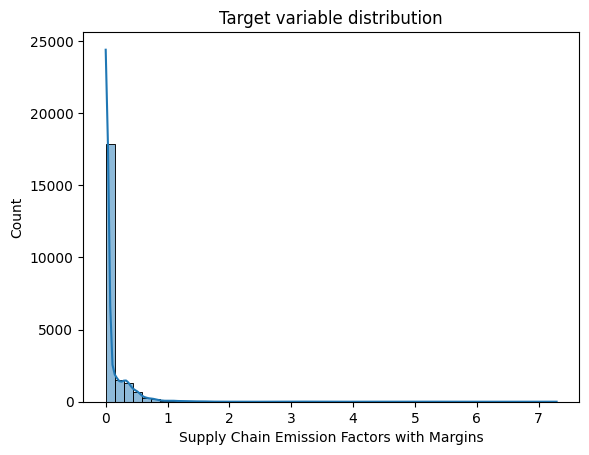

In [223]:
sns.histplot(df['Supply Chain Emission Factors with Margins'],bins=50,kde=True)
plt.title('Target variable distribution')
plt.show

In [224]:
print(df['Substance'].value_counts())

Substance
carbon dioxide    5523
methane           5523
nitrous oxide     5523
other GHGs        5523
Name: count, dtype: int64


In [225]:
print(df['Unit'].value_counts())

Unit
kg/2018 USD, purchaser price         16569
kg CO2e/2018 USD, purchaser price     5523
Name: count, dtype: int64


In [226]:
print(df['Source'].value_counts())

Source
Industry     11060
Commodity    11032
Name: count, dtype: int64


In [227]:
print(df['Unit'].unique())

['kg/2018 USD, purchaser price' 'kg CO2e/2018 USD, purchaser price']


In [228]:
print(df['Substance'].unique())

['carbon dioxide' 'methane' 'nitrous oxide' 'other GHGs']


In [229]:
substance_map={'carbon dioxide':0, 'methane':1, 'nitrous oxide':2, 'other GHGs':3}

In [230]:
df['Substance']=df['Substance'].map(substance_map)

In [231]:
print(df['Substance'].unique())

[0 1 2 3]


In [232]:
print(df['Unit'].unique())

['kg/2018 USD, purchaser price' 'kg CO2e/2018 USD, purchaser price']


In [233]:
unit_map={'kg/2018 USD, purchaser price':0, 'kg CO2e/2018 USD, purchaser price':1}

In [234]:
df['Unit']=df['Unit'].map(unit_map)

In [235]:
print(df['Unit'].unique())

[0 1]


In [236]:
print(df['Source'].unique())

['Commodity' 'Industry']


In [237]:
source_map={'Commodity':0, 'Industry':1}

In [238]:
df['Source']=df['Source'].map(source_map)

In [239]:
print(df['Source'].unique())

[0 1]


In [240]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22092 entries, 0 to 22091
Data columns (total 16 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Code                                                    11032 non-null  object 
 1   Name                                                    11032 non-null  object 
 2   Substance                                               22092 non-null  int64  
 3   Unit                                                    22092 non-null  int64  
 4   Supply Chain Emission Factors without Margins           22092 non-null  float64
 5   Margins of Supply Chain Emission Factors                22092 non-null  float64
 6   Supply Chain Emission Factors with Margins              22092 non-null  float64
 7   DQ ReliabilityScore of Factors without Margins          22092 non-null  int64  
 8   DQ TemporalCorrelation of Factors wi

In [241]:
df.Code.unique()

array(['1111A0', '1111B0', '111200', '111300', '111400', '111900',
       '112120', '1121A0', '112300', '112A00', '113000', '114000',
       '115000', '211000', '212100', '212230', '2122A0', '212310',
       '2123A0', '213111', '21311A', '221100', '221200', '221300',
       '230301', '230302', '233210', '233230', '233240', '233262',
       '2332A0', '2332C0', '2332D0', '233411', '233412', '2334A0',
       '311111', '311119', '311210', '311221', '311224', '311225',
       '311230', '311300', '311410', '311420', '311513', '311514',
       '31151A', '311520', '311615', '31161A', '311700', '311810',
       '3118A0', '311910', '311920', '311930', '311940', '311990',
       '312110', '312120', '312130', '312140', '312200', '313100',
       '313200', '313300', '314110', '314120', '314900', '315000',
       '316000', '321100', '321200', '321910', '3219A0', '322110',
       '322120', '322130', '322210', '322220', '322230', '322291',
       '322299', '323110', '323120', '324110', '324121', '3241

In [242]:
df.Name.unique()

array(['Fresh soybeans, canola, flaxseeds, and other oilseeds',
       'Fresh wheat, corn, rice, and other grains',
       'Fresh vegetables, melons, and potatoes',
       'Fresh fruits and tree nuts',
       'Greenhouse crops, mushrooms, nurseries, and flowers',
       'Tobacco, cotton, sugarcane, peanuts, sugar beets, herbs and spices, and other crops',
       'Dairies', 'Cattle ranches and feedlots', 'Poultry farms',
       'Animal farms and aquaculture ponds (except cattle and poultry)',
       'Timber and raw forest products', 'Wild-caught fish and game',
       'Agriculture and forestry support', 'Unrefined oil and gas',
       'Coal', 'Copper, nickel, lead, and zinc',
       'Iron, gold, silver, and other metal ores', 'Dimensional stone',
       'Sand, gravel, clay, phosphate, other nonmetallic minerals',
       'Well drilling', 'Other support activities for mining',
       'Electricity', 'Natural gas',
       'Drinking water and wastewater treatment',
       'Nonresidential mai

In [243]:
len(df.Name.unique())

395

In [244]:
top_emitters = df[['Name', 'Supply Chain Emission Factors with Margins']].groupby('Name').mean().sort_values(
    'Supply Chain Emission Factors with Margins', ascending=False).head(10) 

In [245]:
top_emitters = top_emitters.reset_index()

In [246]:
top_emitters

,Name,Supply Chain Emission Factors with Margins
0,Cement,1.324964
1,Electricity,1.016143
2,"Dolls, toys, and games",0.832179
3,Lime and gypsum products,0.816536
4,Compressed Gases,0.539679
5,Clothing,0.468714
6,Synthetic dyes and pigments,0.358000
7,Truck transport,0.350964
8,"Copper, nickel, lead, and zinc",0.338464
9,Pipeline transport,0.316321


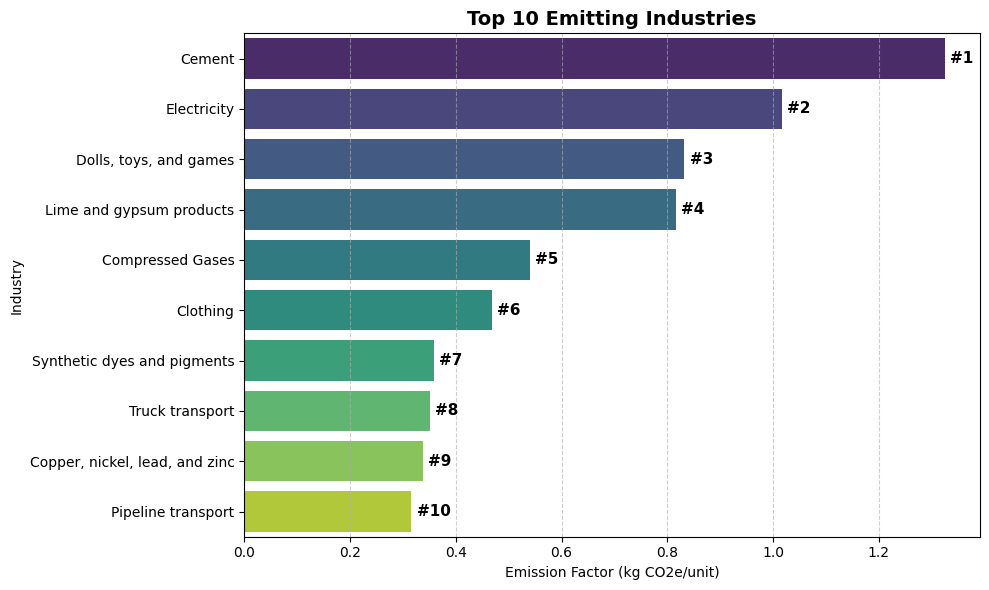

In [247]:
plt.figure(figsize=(10,6))
sns.barplot(
    x='Supply Chain Emission Factors with Margins',
    y='Name',
    data=top_emitters,
    hue='Name',
    palette='viridis' 
)
for i, (value, name) in enumerate(zip(top_emitters['Supply Chain Emission Factors with Margins'], top_emitters.index), start=1):
    plt.text(value + 0.01, i - 1, f'#{i}', va='center', fontsize=11, fontweight='bold', color='black')
plt.title('Top 10 Emitting Industries', fontsize=14, fontweight='bold') 
plt.xlabel('Emission Factor (kg CO2e/unit)') 
plt.ylabel('Industry') 
plt.grid(axis='x', linestyle='--', alpha=0.6) 
plt.tight_layout()

plt.show()

In [248]:
df.drop(columns=['Name','Code','Year'], inplace=True) 

In [249]:
df.head(1)

,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins,Source,Industry Code,Industry Name
0,0,0,0.398,0.073,0.47,4,3,1,4,1,0,NaN,NaN


In [250]:
df.shape

(22092, 13)

In [251]:
df.columns

Index(['Substance', 'Unit', 'Supply Chain Emission Factors without Margins',
       'Margins of Supply Chain Emission Factors',
       'Supply Chain Emission Factors with Margins',
       'DQ ReliabilityScore of Factors without Margins',
       'DQ TemporalCorrelation of Factors without Margins',
       'DQ GeographicalCorrelation of Factors without Margins',
       'DQ TechnologicalCorrelation of Factors without Margins',
       'DQ DataCollection of Factors without Margins', 'Source',
       'Industry Code', 'Industry Name'],
      dtype='object')

In [252]:
X = df.drop(columns=['Supply Chain Emission Factors with Margins'])
y = df['Supply Chain Emission Factors with Margins']

In [253]:
X.head()

,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins,Source,Industry Code,Industry Name
0,0,0,0.398,0.073,4,3,1,4,1,0,NaN,NaN
1,1,0,0.001,0.001,4,3,1,1,1,0,NaN,NaN
2,2,0,0.002,0.000,4,3,1,4,1,0,NaN,NaN
3,3,1,0.002,0.000,3,3,1,3,1,0,NaN,NaN
4,0,0,0.659,0.081,4,3,1,4,1,0,NaN,NaN


In [254]:
y.head()

0    0.470
1    0.002
2    0.002
3    0.002
4    0.740
Name: Supply Chain Emission Factors with Margins, dtype: float64

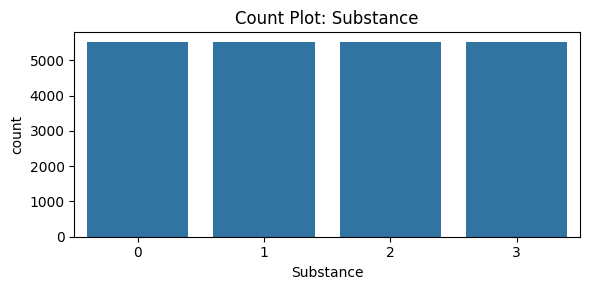

In [255]:
plt.figure(figsize=(6, 3))
sns.countplot(x=df["Substance"])
plt.title("Count Plot: Substance")
plt.xticks()
plt.tight_layout()
plt.show()

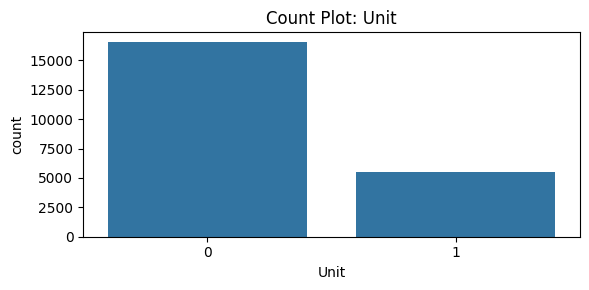

In [256]:
plt.figure(figsize=(6, 3))
sns.countplot(x=df["Unit"])
plt.title("Count Plot: Unit")
plt.tight_layout()
plt.show()

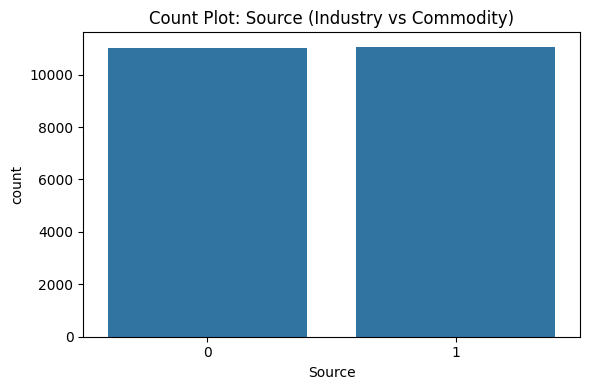

In [257]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df["Source"])
plt.title("Count Plot: Source (Industry vs Commodity)")
plt.tight_layout()
plt.show()

In [258]:
df.columns

Index(['Substance', 'Unit', 'Supply Chain Emission Factors without Margins',
       'Margins of Supply Chain Emission Factors',
       'Supply Chain Emission Factors with Margins',
       'DQ ReliabilityScore of Factors without Margins',
       'DQ TemporalCorrelation of Factors without Margins',
       'DQ GeographicalCorrelation of Factors without Margins',
       'DQ TechnologicalCorrelation of Factors without Margins',
       'DQ DataCollection of Factors without Margins', 'Source',
       'Industry Code', 'Industry Name'],
      dtype='object')

In [259]:
df.select_dtypes(include=np.number).corr()

,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins,Source
Substance,1.000000e+00,7.745967e-01,-0.391851,-0.218400,-0.421603,0.095092,-3.667637e-15,NaN,0.198415,NaN,4.273306e-16
Unit,7.745967e-01,1.000000e+00,-0.155859,-0.094300,-0.169741,-0.025159,-3.173071e-17,NaN,0.286990,NaN,-1.545892e-17
Supply Chain Emission Factors without Margins,-3.918505e-01,-1.558594e-01,1.000000,0.143005,0.962971,-0.098000,9.283870e-03,NaN,0.148410,NaN,2.713112e-02
Margins of Supply Chain Emission Factors,-2.184002e-01,-9.429989e-02,0.143005,1.000000,0.404541,-0.069598,7.953109e-03,NaN,0.086335,NaN,-6.750426e-02
Supply Chain Emission Factors with Margins,-4.216032e-01,-1.697410e-01,0.962971,0.404541,1.000000,-0.109494,1.074848e-02,NaN,0.160574,NaN,6.687828e-03
DQ ReliabilityScore of Factors without Margins,9.509190e-02,-2.515938e-02,-0.098000,-0.069598,-0.109494,1.000000,-2.170715e-02,NaN,0.073583,NaN,-1.228726e-02
DQ TemporalCorrelation of Factors without Margins,-3.667637e-15,-3.173071e-17,0.009284,0.007953,0.010748,-0.021707,1.000000e+00,NaN,-0.030607,NaN,-2.909814e-15
DQ GeographicalCorrelation of Factors without Margins,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DQ TechnologicalCorrelation of Factors without Margins,1.984154e-01,2.869901e-01,0.148410,0.086335,0.160574,0.073583,-3.060675e-02,NaN,1.000000,NaN,2.827202e-02
DQ DataCollection of Factors without Margins,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [260]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22092 entries, 0 to 22091
Data columns (total 13 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Substance                                               22092 non-null  int64  
 1   Unit                                                    22092 non-null  int64  
 2   Supply Chain Emission Factors without Margins           22092 non-null  float64
 3   Margins of Supply Chain Emission Factors                22092 non-null  float64
 4   Supply Chain Emission Factors with Margins              22092 non-null  float64
 5   DQ ReliabilityScore of Factors without Margins          22092 non-null  int64  
 6   DQ TemporalCorrelation of Factors without Margins       22092 non-null  int64  
 7   DQ GeographicalCorrelation of Factors without Margins   22092 non-null  int64  
 8   DQ TechnologicalCorrelation of Facto

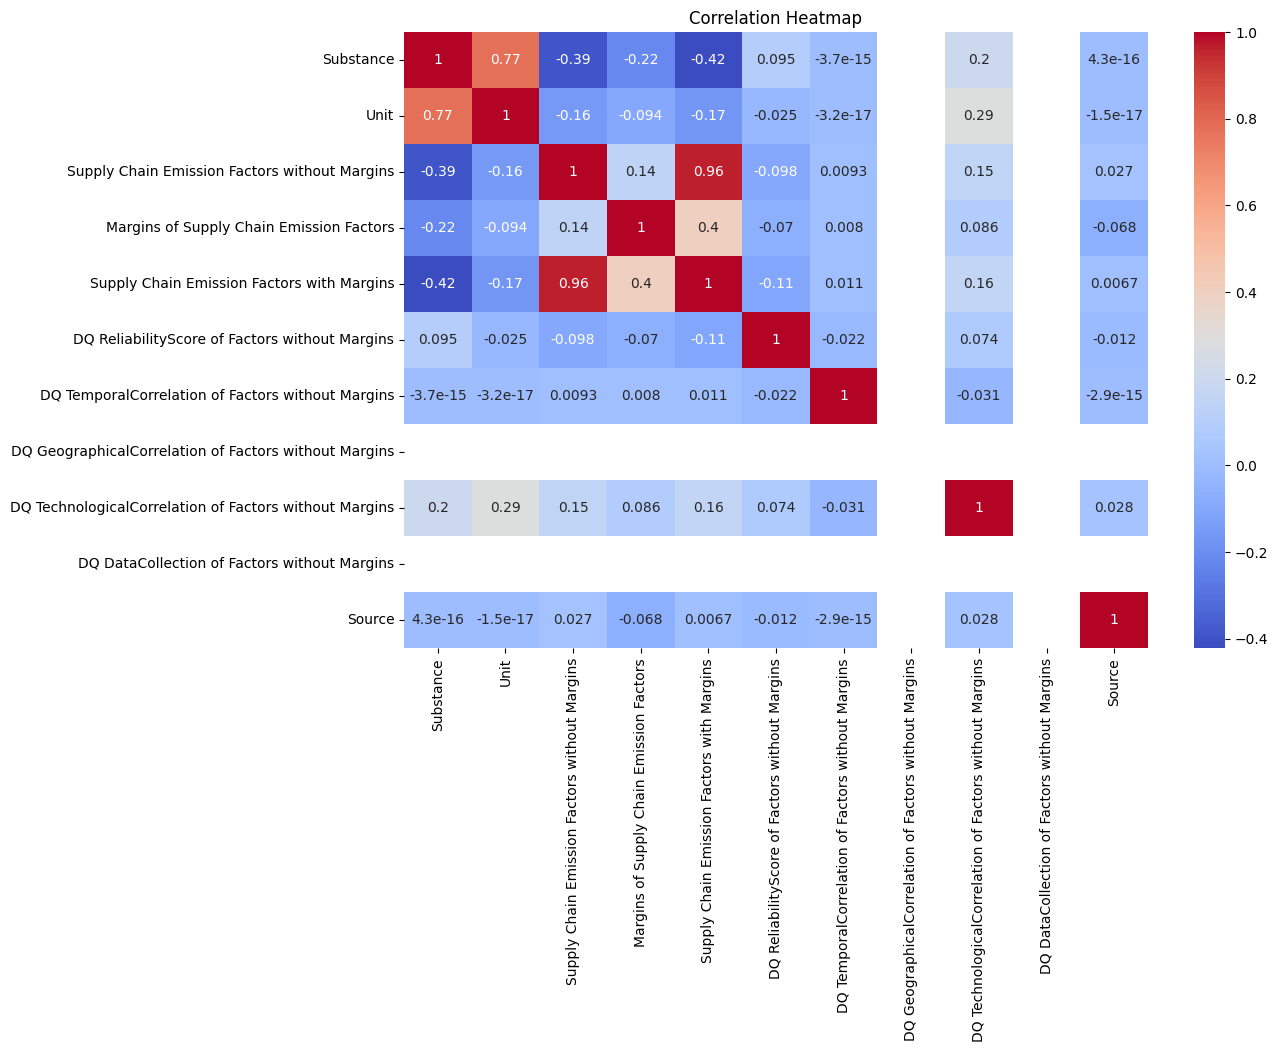

In [261]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [262]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
Substance,22092.0,1.500000,1.118059,0.0,0.75,1.500,2.250,3.000
Unit,22092.0,0.250000,0.433023,0.0,0.00,0.000,0.250,1.000
Supply Chain Emission Factors without Margins,22092.0,0.084807,0.267039,0.0,0.00,0.002,0.044,7.228
Margins of Supply Chain Emission Factors,22092.0,0.012857,0.078720,0.0,0.00,0.000,0.000,3.349
DQ ReliabilityScore of Factors without Margins,22092.0,3.308030,0.499643,2.0,3.00,3.000,4.000,4.000
DQ TemporalCorrelation of Factors without Margins,22092.0,2.571429,0.494883,2.0,2.00,3.000,3.000,3.000
DQ GeographicalCorrelation of Factors without Margins,22092.0,1.000000,0.000000,1.0,1.00,1.000,1.000,1.000
DQ TechnologicalCorrelation of Factors without Margins,22092.0,2.632129,1.135661,1.0,1.00,3.000,3.000,5.000
DQ DataCollection of Factors without Margins,22092.0,1.000000,0.000000,1.0,1.00,1.000,1.000,1.000
Source,22092.0,0.500634,0.500011,0.0,0.00,1.000,1.000,1.000


In [263]:
#fixed an dtype error
X_numeric = X.select_dtypes(include=['number'])


In [264]:
scaler1 = StandardScaler()
X1_scaled = scaler1.fit_transform(X_numeric)

In [265]:
scaler2 = MaxAbsScaler()
X2_scaled = scaler2.fit_transform(X_numeric)

In [266]:
X1_scaled[0].min(),X1_scaled[0].max()

(-1.3416407864998738, 1.3849614361966767)

In [267]:
X2_scaled[0].min(),X2_scaled[0].max()

(0.0, 1.0)

In [268]:
np.round(X1_scaled.mean()),np.round(X1_scaled.std())

(-0.0, 1.0)

In [269]:
np.round(X2_scaled.mean()),np.round(X2_scaled.std())

(1.0, 0.0)

In [270]:
X.shape

(22092, 12)

In [271]:
#for standardscaler
X1_train, X1_test, y1_train, y1_test = train_test_split(X1_scaled, y, test_size=0.2, random_state=42) # Splitting data into training and testing sets 



In [272]:
#for maxabsscaler
X2_train, X2_test, y2_train, y2_test = train_test_split(X2_scaled, y, test_size=0.4, random_state=39) # Splitting data into training and testing sets 


In [273]:
X1_train.shape

(17673, 10)

In [274]:
X2_train.shape

(13255, 10)

In [275]:
# Initializing Random Forest Regressor for standardscaler
RF_model1 = RandomForestRegressor(random_state=42)


In [276]:
#Initializig ExtraTreesRegressr for maxabsscaler
RF_model2 = ExtraTreesRegressor(random_state=39)

In [277]:
# Initializing Random Forest Regressor for maxabsscaler
RF_model3 = RandomForestRegressor(random_state=39)

In [278]:
# Initializing ExtraTreesRegressr for standardscaler
RF_model4 = ExtraTreesRegressor(random_state=42)

In [279]:
# Fitting the model on training data 
RF_model1.fit(X1_train, y1_train) 

RandomForestRegressor(random_state=42)

In [280]:
# Fitting the model on training data 
RF_model2.fit(X2_train, y2_train) 

ExtraTreesRegressor(random_state=39)

In [281]:
RF_model3.fit(X2_train, y2_train) 

RandomForestRegressor(random_state=39)

In [282]:
RF_model4.fit(X1_train, y1_train) 

ExtraTreesRegressor(random_state=42)

In [283]:
 # Making predictions on the test set 1
RF_y_pred1 = RF_model1.predict(X1_test)

In [284]:
 # Making predictions on the test set 2
RF_y_pred2 = RF_model2.predict(X2_test)

In [285]:
 # Making predictions on the test set 3
RF_y_pred3 = RF_model3.predict(X2_test)

In [286]:
 # Making predictions on the test set 4
RF_y_pred4 = RF_model4.predict(X1_test)

In [287]:
RF_y_pred1[:20] #first model test

array([2.93080000e-01, 1.00000000e-03, 1.21122793e-03, 1.16130018e-03,
       0.00000000e+00, 4.00000000e-03, 1.24555977e-04, 2.20009044e-03,
       2.00000000e-03, 3.94080000e-01, 0.00000000e+00, 1.40000000e-02,
       4.08395607e-03, 7.00000000e-03, 2.15970231e-03, 2.89160331e-04,
       1.02821706e-03, 3.15790000e-01, 9.00000000e-03, 0.00000000e+00])

In [288]:
RF_y_pred2[:20] #2nd model test

array([0.00000000e+00, 0.00000000e+00, 1.15000000e-01, 2.00000000e-03,
       6.00000000e-03, 3.90000000e-02, 8.60000000e-02, 1.11875000e-03,
       2.53900000e-01, 2.00000000e-03, 4.22222222e-03, 0.00000000e+00,
       1.13725490e-03, 1.46153846e-04, 3.00000000e-03, 1.71428571e-03,
       1.50000000e-02, 5.00000000e-03, 2.85714286e-04, 1.03690000e-01])

In [289]:
RF_y_pred3[:20] #3rd model test

array([0.00000000e+00, 0.00000000e+00, 1.15010000e-01, 2.00000000e-03,
       6.00000000e-03, 3.91500000e-02, 8.60300000e-02, 1.11621615e-03,
       2.53520000e-01, 2.00000000e-03, 4.23967419e-03, 0.00000000e+00,
       1.13781732e-03, 1.39943948e-04, 3.00000000e-03, 1.71586274e-03,
       1.50000000e-02, 5.00000000e-03, 2.89785979e-04, 1.03080000e-01])

In [290]:
RF_y_pred4[:20] #4th model test

array([2.91510000e-01, 1.00000000e-03, 1.21111111e-03, 1.15625000e-03,
       0.00000000e+00, 4.00000000e-03, 1.21794872e-04, 2.20000000e-03,
       2.00000000e-03, 3.95260000e-01, 0.00000000e+00, 1.40000000e-02,
       4.08333333e-03, 7.00000000e-03, 2.15789474e-03, 2.92682927e-04,
       1.02739726e-03, 3.18960000e-01, 9.00000000e-03, 0.00000000e+00])

In [291]:
#for standardscaler + randomforestregressor
RF_mse1 = mean_squared_error(y1_test, RF_y_pred1) 
RF_rmse1 = np.sqrt(RF_mse1) 

RF_r2a = r2_score(y1_test, RF_y_pred1)

print(f'Root Mean Squared Error: {RF_rmse1}')
print(f'R² Score: {RF_r2a}')

Root Mean Squared Error: 0.006143789217304181
R² Score: 0.9993280085696331


In [293]:
#for MaxAbsScaler + ExtraTreesRegressor
RF_mse2 = mean_squared_error(y2_test, RF_y_pred2)
RF_rmse2 = np.sqrt(RF_mse2)

RF_r2b = r2_score(y2_test, RF_y_pred2)

print(f'Root Mean Squared Error: {RF_rmse2}')
print(f'R² Score: {RF_r2b}')

Root Mean Squared Error: 0.002940416627682605
R² Score: 0.9998834014395034


In [294]:
#for MaxAbsScaler + randomforestregressor
RF_mse3 = mean_squared_error(y2_test, RF_y_pred3) 
RF_rmse3 = np.sqrt(RF_mse3) 

RF_r2c = r2_score(y2_test, RF_y_pred3)

print(f'Root Mean Squared Error: {RF_rmse3}')
print(f'R² Score: {RF_r2c}')

Root Mean Squared Error: 0.007432743149884171
R² Score: 0.9992549701051348


In [295]:
#for standardscaler + ExtraTreesRegressor
RF_mse4 = mean_squared_error(y1_test, RF_y_pred4)
RF_rmse4 = np.sqrt(RF_mse4)

RF_r2d = r2_score(y1_test, RF_y_pred4)

print(f'Root Mean Squared Error: {RF_rmse4}')
print(f'R² Score: {RF_r2d}')

Root Mean Squared Error: 0.0029285871147916006
R² Score: 0.9998473111182744


In [346]:
from sklearn.linear_model import LinearRegression # Importing Linear Regression model 
LR_model1 = LinearRegression() # Initializing Linear Regression model
# Fitting the Linear Regression model on training data

LR_model1.fit(X1_train, y1_train)

LR_y_pred1 = LR_model.predict(X1_test) # Making predictions on the test set using Linear Regression model 


LR1_mse = mean_squared_error(y1_test, LR_y_pred) # Calculating Mean Squared Error (MSE) for Linear Regression model
LR1_rmse = np.sqrt(LR1_mse) # Calculating Root Mean Squared Error (RMSE) for Linear Regression model 
LR1_r2 = r2_score(y1_test, LR_y_pred1) # Calculating R² score for Linear Regression model 

print(f'RMSE: {LR1_rmse}')
print(f'R² Score: {LR1_r2}')

RMSE: 0.00028073792916286924
R² Score: 0.9999985968848819


In [349]:


LR_model2 = LinearRegression()
LR_model2.fit(X2_train, y2_train)

LR_y_pred2 = LR_model2.predict(X2_test)

LR2_mse = mean_squared_error(y2_test, LR_y_pred2)
LR2_rmse = np.sqrt(LR2_mse)
LR2_r2 = r2_score(y2_test, LR_y_pred2)

print(f'RMSE: {LR2_rmse}')
print(f'R² Score: {LR2_r2}')

RMSE: 0.0002792135062825027
R² Score: 0.9999989486476407


In [333]:
# Define the parameter grid for hyperparameter tuning of randomforest + standardsacler
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}


In [334]:
# Perform grid search with cross-validation to find the best hyperparameters 
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, n_jobs=-1)

# Fit the grid search model on the training data 
grid_search.fit(X1_train, y1_train)

# Best model from grid search
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}


In [335]:
# Perform grid search with cross-validation to find the best hyperparameters 
grid_search2 = GridSearchCV(ExtraTreesRegressor(random_state=39), param_grid, cv=3, n_jobs=-1)

# Fit the grid search model on the training data 
grid_search2.fit(X2_train, y2_train)

# Best model from grid search
best_model2 = grid_search2.best_estimator_
print("Best Parameters:", grid_search2.best_params_)

Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}


In [336]:
# Perform grid search with cross-validation to find the best hyperparameters 
grid_search3 = GridSearchCV(RandomForestRegressor(random_state=39), param_grid, cv=3, n_jobs=-1)

# Fit the grid search model on the training data 
grid_search3.fit(X2_train, y2_train)

# Best model from grid search
best_model3 = grid_search3.best_estimator_
print("Best Parameters:", grid_search3.best_params_)

Best Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}


In [338]:
# Perform grid search with cross-validation to find the best hyperparameters 
grid_search4 = GridSearchCV(ExtraTreesRegressor(random_state=42), param_grid, cv=3, n_jobs=-1)

# Fit the grid search model on the training data 
grid_search4.fit(X1_train, y1_train)

# Best model from grid search
best_model4 = grid_search4.best_estimator_
print("Best Parameters:", grid_search4.best_params_)

Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}


In [339]:
y_pred_bestRF1 = best_model.predict(X1_test)


HP1_mse = mean_squared_error(y1_test, y_pred_bestRF1)
HP1_rmse = np.sqrt(HP1_mse)
HP1_r2 = r2_score(y1_test, y_pred_bestRF1)

print(f'RMSE: {HP1_rmse}')
print(f'R² Score: {HP1_r2}')

RMSE: 0.005948528382514106
R² Score: 0.9993700440298772


In [340]:
y_pred_bestET1 = best_model2.predict(X2_test)


HP2_mse = mean_squared_error(y2_test, y_pred_bestET1)
HP2_rmse = np.sqrt(HP2_mse)
HP2_r2 = r2_score(y2_test, y_pred_bestET1)

print(f'RMSE: {HP2_rmse}')
print(f'R² Score: {HP2_r2}')

RMSE: 0.002740385987278045
R² Score: 0.999898725775786


In [341]:
y_pred_bestRF2 = best_model3.predict(X2_test)


HP3_mse = mean_squared_error(y2_test, y_pred_bestRF2)
HP3_rmse = np.sqrt(HP3_mse)
HP3_r2 = r2_score(y2_test, y_pred_bestRF2)

print(f'RMSE: {HP3_rmse}')
print(f'R² Score: {HP3_r2}')

RMSE: 0.006956995663253879
R² Score: 0.9993472920325179


In [342]:
y_pred_bestET2 = best_model4.predict(X1_test)


HP4_mse = mean_squared_error(y1_test, y_pred_bestET2)
HP4_rmse = np.sqrt(HP4_mse)
HP4_r2 = r2_score(y1_test, y_pred_bestET2)

print(f'RMSE: {HP4_rmse}')
print(f'R² Score: {HP4_r2}')

RMSE: 0.0029995035748749043
R² Score: 0.9998398267869024


In [350]:
results = {
    'Model': ['Random Forest (Standard)','Extra Trees (MaxAbs)','Random Forest (MaxAbs)','Extra Trees (Standard)', 'Linear Regression (Standard)','Linear Regression (MaxAbs)', 'Random Forest (Standard Tuned)','Extra Trees (MaxAbs Tuned)','Random Forest (MaxAbs Tuned)','Extra Trees (Standard Tuned)'],
    'MSE': [RF_mse1,RF_mse2,RF_mse3,RF_mse4, LR1_mse, LR2_mse, HP1_mse,HP2_mse,HP3_mse,HP4_mse],
    'RMSE': [RF_rmse1, RF_rmse2,RF_rmse2,RF_rmse4, LR1_rmse, LR2_rmse, HP1_rmse,HP2_rmse,HP3_rmse,HP4_rmse],
    'R2': [RF_r2a,RF_r2b,RF_r2c,RF_r2d, LR1_r2, LR2_r2, HP1_r2, HP2_r2, HP3_r2, HP4_r2]
}
comparison_df = pd.DataFrame(results)
print(comparison_df)

                            Model           MSE      RMSE        R2
0        Random Forest (Standard)  3.774615e-05  0.006144  0.999328
1            Extra Trees (MaxAbs)  8.646050e-06  0.002940  0.999883
2          Random Forest (MaxAbs)  5.524567e-05  0.002940  0.999255
3          Extra Trees (Standard)  8.576622e-06  0.002929  0.999847
4    Linear Regression (Standard)  7.881378e-08  0.000281  0.999999
5      Linear Regression (MaxAbs)  7.796018e-08  0.000279  0.999999
6  Random Forest (Standard Tuned)  3.538499e-05  0.005949  0.999370
7      Extra Trees (MaxAbs Tuned)  7.509715e-06  0.002740  0.999899
8    Random Forest (MaxAbs Tuned)  4.839979e-05  0.006957  0.999347
9    Extra Trees (Standard Tuned)  8.997022e-06  0.003000  0.999840


In [351]:
joblib.dump(best_model, 'models/LR_model1.pkl')
joblib.dump(scaler, 'models/scaler.pkl')

['models/scaler.pkl']